In [21]:
##looking for the directory where dataset has to be stored as it was not originally stored in mldata
from sklearn.datasets.base import get_data_home
print(get_data_home())

C:\Users\Gandharv Dalal\scikit_learn_data


In [23]:
from sklearn.datasets import fetch_mldata
mnist=fetch_mldata('MNIST original')


C:\anaconda\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\anaconda\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [24]:
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [36]:
import pandas as pd
pixels=pd.DataFrame(mnist.data)
labels=pd.DataFrame(mnist.target)

In [37]:
pixels.tail()
##there are 784 pixel values as an array ( each image consist of 28*28 pixels)


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
pixels.loc[0].values
#these following values shows the pixels intensity(which ranges from 0(white) to 255(black)) 

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [39]:
##looking the labels of the 0 column
labels.loc[0].values

array([0.])

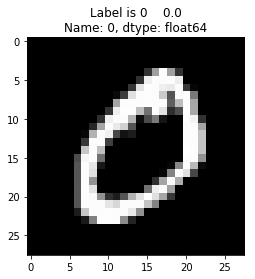

In [43]:
##visualizing the mnsit dataset
import numpy as np
import matplotlib.pyplot as plt
label=labels.loc[0]
pixel=pixels.loc[0]
pixel=np.array(pixel,dtype='uint8')
pixel=pixel.reshape(28,28)
plt.title('Label is {label}'.format(label=label))
plt.imshow(pixel,cmap='gray')
plt.show()

In [45]:
##splitting the data set into training and testing dataset 
##we are setting test size=1/7 because we want the training dataset size 60000 and testing data set 10000
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(mnist.data, mnist.target,test_size=1/7.0)


In [46]:
##importing the random forest model classifier
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)


C:\anaconda\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [47]:
prediction=model.predict(x_test)

In [49]:
##checking the accuracy score with x_test and y_test
## its 94%
model.score(x_test,y_test)

0.9458

In [51]:
## checking the accuracy using predicted model and y_test
##its again 94%
from sklearn.metrics import accuracy_score
accuracy_score(prediction,y_test)

0.9458

In [52]:
##lets predict 
model.predict(x_test[0].reshape(1,-1))

array([3.])

In [53]:
##lets check whether the predicted model is correct or not
y_test[0]

3.0

In [54]:
##yes its same therefore we can say that our model have predicted the digit correctly

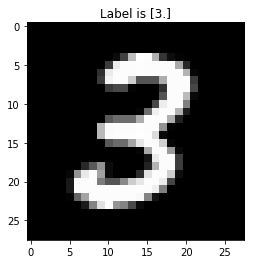

In [56]:
##lets visualize the prediction 
y_predicted=model.predict(x_test[0].reshape(1,-1))
label=y_predicted
pixel=x_test[0]
pixel=np.array(pixel,dtype='uint8')
pixel=pixel.reshape(28,28)
plt.title('Label is {label}'.format(label=label))
plt.imshow(pixel,cmap='gray')
plt.show()